<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula8a_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data[:,2:4]
y = dataset.target
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

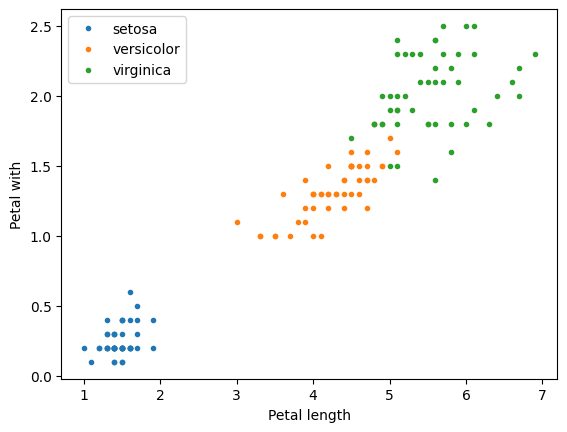

In [3]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
  plt.plot(X[y==i, 0], X[y==i, 1], ".", label=dataset.target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal with")
plt.legend()
plt.show()

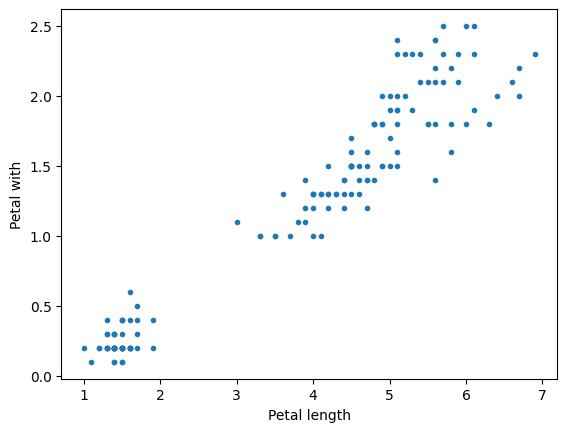

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal with")
plt.show()

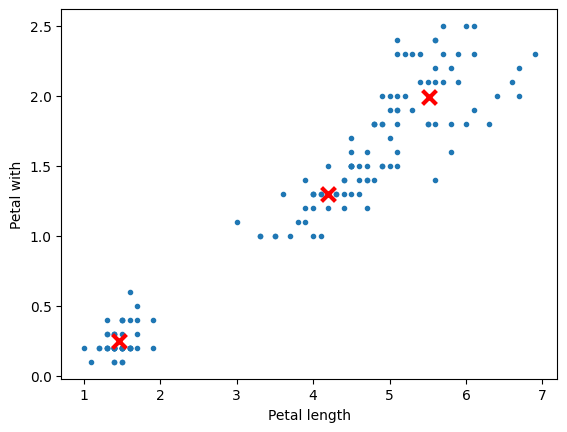

In [38]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):
  def __init__(self, n_clusters=3):
    self.n_clusters = n_clusters

  def _init_centroids(self, X):
    min = np.min(X, axis=0)
    # print(f"min {min}")
    max = np.max(X, axis=0)
    # print(f"max {max}")
    centroids = []
    for i in range(self.n_clusters):
      centroid = []
      for j in range(X.shape[1]):
        centroid.append(random.uniform(min[j], max[j]))
      # print(f"centroid {i}: {centroid}")
      centroids.append(centroid)
    self.cluster_centers_ = np.array(centroids)

  def fit(self, X, y=None):
    self._init_centroids(X)
    previous_centroids = self.cluster_centers_.copy()
    iter = 0
    while True:
      '''
      iter += 1
      print(f"iteração {iter}")
      print(f"centroids: \n{self.cluster_centers_}")
      plt.scatter(X[:, 0], X[:, 1], marker=".")
      plt.scatter(self.cluster_centers_[:,0], self.cluster_centers_[:,1],
                  marker="x", color="r", s=100, linewidth=3)
      plt.xlabel("Petal length")
      plt.ylabel("Petal with")
      plt.show()
      '''
      ypred = self.predict(X)
      for i in range(self.n_clusters):
        if np.any(ypred==i):
          self.cluster_centers_[i] = np.mean(X[ypred==i], axis=0)
      if np.allclose(previous_centroids, self.cluster_centers_, atol=0.1):
        break
      previous_centroids = self.cluster_centers_.copy()

  def _distancias(self, x):
    diferenca = self.cluster_centers_ - x
    quadrado = diferenca ** 2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz

  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self._distancias(X[i])
      centroid = np.argmin(distancias)
      ypred[i] = centroid
    return ypred

kmeans = Kmeans()
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], marker=".")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="x", color="r", s=100, linewidth=3)
plt.xlabel("Petal length")
plt.ylabel("Petal with")
plt.show()

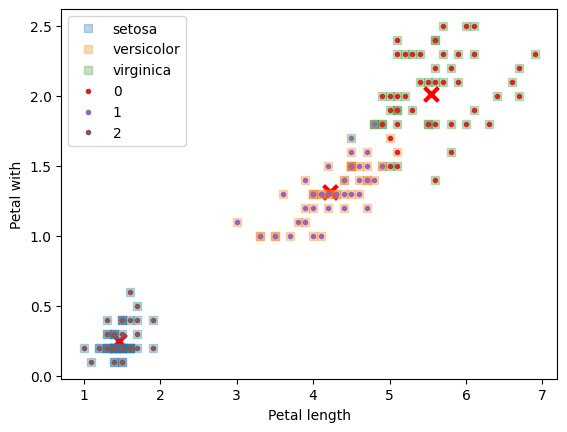

In [44]:
for i in range(len(set(y))):
  plt.plot(X[y==i, 0], X[y==i, 1], "s", label=dataset.target_names[i], alpha=0.3)

kmeans = Kmeans()
kmeans.fit(X)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="x", color="r", s=100, linewidth=3)
ypred = kmeans.predict(X)

for i in range(len(set(y))):
  plt.plot(X[ypred==i, 0], X[ypred==i, 1], ".", label=i)

plt.xlabel("Petal length")
plt.ylabel("Petal with")
plt.legend()
plt.show()